In [442]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA # PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, jaccard_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV, KFold # train-test split, cross validation


In [208]:
df = pd.DataFrame(pd.read_csv("./data/customer-churn.csv"))

In [209]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [210]:
summary_num = df.describe()
print(summary_num)

summary_factor = df.describe(include = 'object')
print(summary_factor)


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3          

In [211]:
print("Dimensions:",df.shape)

Dimensions: (7043, 21)


In [212]:
#remove null values
df['TotalCharges'].str.strip().eq('').sum()
df["total_charges_isnull"] = df['TotalCharges'].str.strip().eq('')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charges_isnull
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,False
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,False
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,False


In [235]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [237]:

df1 = df[df['total_charges_isnull'] == False].drop(["total_charges_isnull","customerID"], axis=1)


In [255]:
# convert total charges to numeric from strings
df1["TotalCharges"].describe(include='object')
df1['TotalCharges'] = df1['TotalCharges'].apply(float)
df1.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


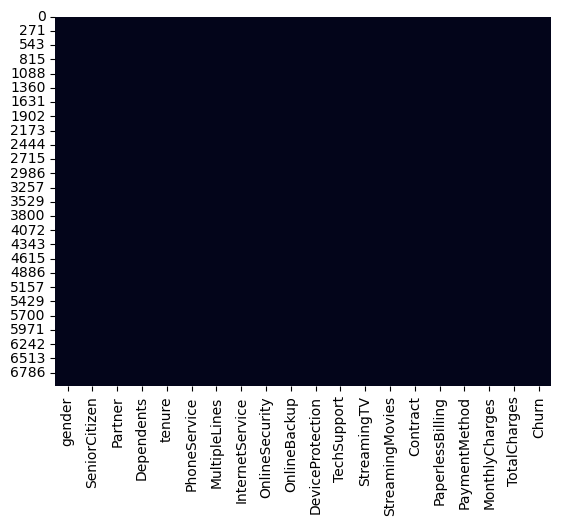

In [239]:
sns.heatmap(df1.isna(), cbar=False)
na_count = df1.isna().sum()
print(na_count)

In [256]:
# one hot-encoder
encoder = OneHotEncoder(sparse_output=False)

# used for col names
df_factors = df1.select_dtypes(include='object').drop("Churn", axis = 1)

df1_encod = pd.DataFrame(encoder.fit_transform(df_factors[df_factors.columns]),
                         columns=encoder.get_feature_names_out(df_factors.columns))

In [278]:
num_df = df1.drop(df_factors.columns,axis=1).reset_index(drop = True)
num_df1 = num_df.drop("Churn", axis=1)


In [281]:
# Normalize the numeric data
#numeric_columns = num_df1.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = num_df1.columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df1[numeric_columns])

#make to dataframe scaled 
scaled_df1 = pd.DataFrame(scaled_values, columns=numeric_columns)



In [485]:
# combine dataset with one hot-encoder
df2 = pd.concat([scaled_df1, df1_encod,df1['Churn'].reset_index(drop=True)], axis = 1)
df2

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.280248,-1.161694,-0.994194,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,No
1,0.064303,-0.260878,-0.173740,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,No
2,-1.239504,-0.363923,-0.959649,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Yes
3,0.512486,-0.747850,-0.195248,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,No
4,-1.239504,0.196178,-0.940457,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,No
7028,1.612573,1.276493,2.241056,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,No
7029,-0.872808,-1.170004,-0.854514,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,No
7030,-1.158016,0.319168,-0.872095,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Yes


In [288]:
# convert response to 1 or 0
def is_churn(Churn):
    if Churn == "Yes":
        return 1
    else:
        return 0
    
df2["is_churn"] = df2["Churn"].apply(is_churn)

In [289]:
df3 = df2.drop("Churn", axis=1) 
df3

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,is_churn
0,-1.280248,-1.161694,-0.994194,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.064303,-0.260878,-0.173740,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,-1.239504,-0.363923,-0.959649,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.512486,-0.747850,-0.195248,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,-1.239504,0.196178,-0.940457,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.343137,0.664868,-0.129180,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
7028,1.612573,1.276493,2.241056,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
7029,-0.872808,-1.170004,-0.854514,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
7030,-1.158016,0.319168,-0.872095,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [284]:
# df3.to_csv("file.csv", index=False)

In [295]:
num_df1.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Text(0.5, 1.0, 'Histogram of Total Charges')

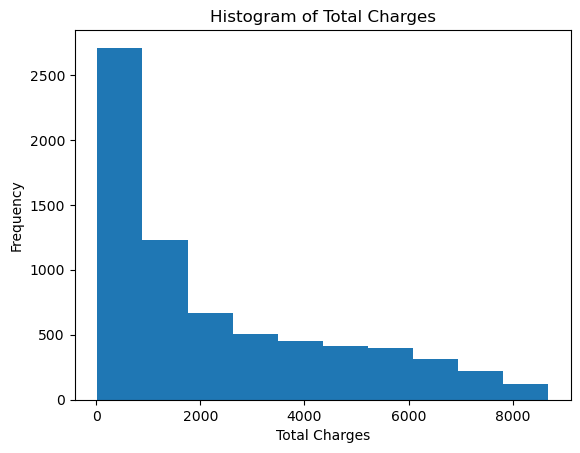

In [297]:
plt.hist(df1['TotalCharges'])
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Total Charges')


Text(0, 0.5, 'Frequencey')

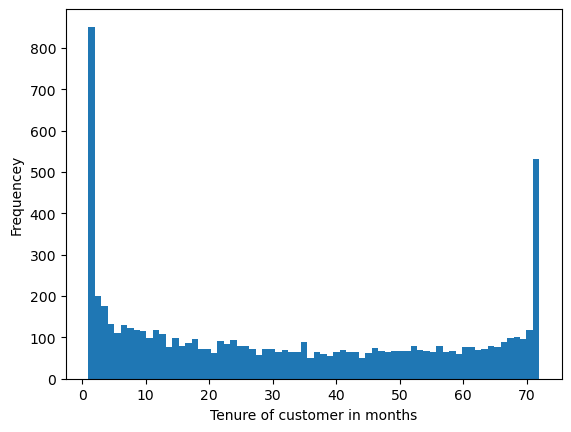

In [482]:

plt.hist(df1['tenure'], bins=70)
plt.xlabel('Tenure of customer in months')
plt.ylabel('Frequencey')


Text(0, 0.5, 'Frequency')

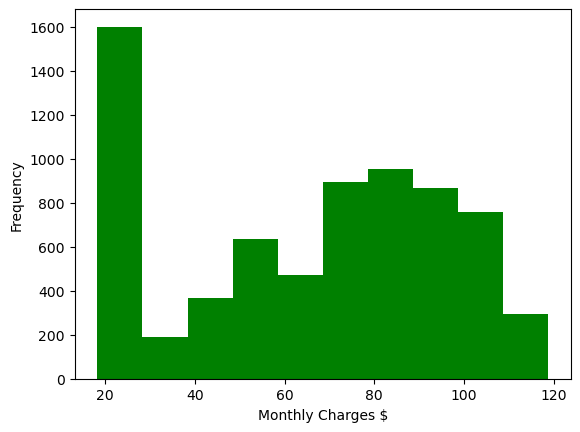

In [479]:
plt.hist(df1['MonthlyCharges'], color='green')
plt.xlabel('Monthly Charges $')
plt.ylabel("Frequency")


In [306]:
df1.describe(include='object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


([<matplotlib.axis.XTick at 0x1d4aeb40af0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

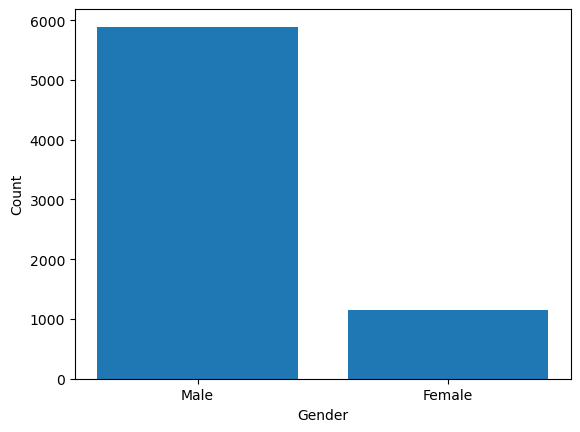

In [314]:
gender_labels = ['Male', 'Female']
gender_values = [0, 1]

plt.bar(df1['SeniorCitizen'].value_counts().index, df1['SeniorCitizen'].value_counts().values )
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(gender_values, gender_labels)

Text(0.5, 1.0, 'Contract term of customer')

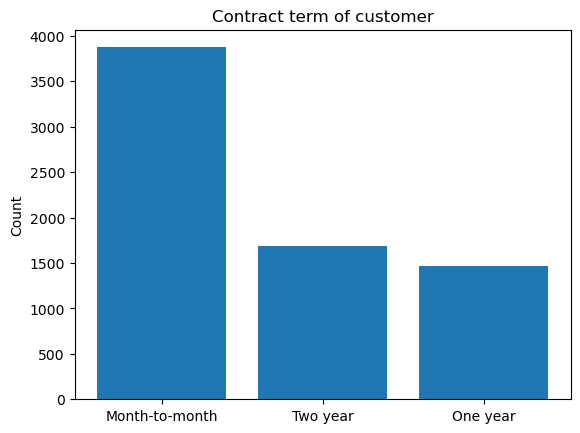

In [347]:
plt.bar(df1['Contract'].value_counts().index, df1['Contract'].value_counts().values )
plt.ylabel("Count")
plt.title('Contract term of customer')

In [333]:
from sklearn.linear_model import LogisticRegression


In [325]:
x = df3.drop('is_churn', axis=1)
y = df3['is_churn']

In [329]:
#logistic
logistic_pipe = Pipeline([
    ('log', LogisticRegression(penalty='l1', solver='saga', max_iter=2000))
], verbose=True)

param_grid = {
    'log__class_weight': [None,'balanced']
}

In [330]:
# fit logistic lasso regression
logistic_cv = GridSearchCV(logistic_pipe, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
logistic_cv.fit(x,y)

[Pipeline] ............... (step 1 of 1) Processing log, total=   1.7s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('log',
                                        LogisticRegression(max_iter=2000,
                                                           penalty='l1',
                                                           solver='saga'))],
                                verbose=True),
             n_jobs=-1, param_grid={'log__class_weight': [None, 'balanced']},
             scoring='accuracy')

In [331]:
# fit grid search to data
log_best_params = logistic_cv.best_params_
print(log_best_params)

{'log__class_weight': None}


In [343]:
coeff = logistic_cv.best_estimator_.named_steps['log'].coef_

coef_df = pd.DataFrame({'Variable': x.columns,
                        'Log-Odds Coefficient': coeff[0],
                        'Odds Ratio coefficient': np.exp(coeff[0]) })

print(tabulate(coef_df.sort_values('Odds Ratio coefficient', ascending= False), headers='keys', tablefmt='psql'))


+----+-----------------------------------------+------------------------+--------------------------+
|    | Variable                                |   Log-Odds Coefficient |   Odds Ratio coefficient |
|----+-----------------------------------------+------------------------+--------------------------|
| 17 | InternetService_Fiber optic             |              0.835279  |                 2.30546  |
|  2 | TotalCharges                            |              0.683891  |                 1.98157  |
| 37 | Contract_Month-to-month                 |              0.66228   |                 1.93921  |
| 19 | OnlineSecurity_No                       |              0.379076  |                 1.46093  |
| 28 | TechSupport_No                          |              0.356122  |                 1.42778  |
| 44 | PaymentMethod_Electronic check          |              0.312938  |                 1.36744  |
| 36 | StreamingMovies_Yes                     |              0.239647  |                 1

In [348]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [356]:
tree_pipeline = Pipeline([
    ('tree', DecisionTreeClassifier())
], verbose=True)

tree_param = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [3, 5, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4]    
}

In [355]:
# tune paramters
tree_cv = GridSearchCV(tree_pipeline, tree_param, cv = 10, scoring = 'accuracy', n_jobs=-1)
tree_cv.fit(x, y)

[Pipeline] .............. (step 1 of 1) Processing tree, total=   0.0s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tree', DecisionTreeClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'tree__criterion': ['gini', 'entropy'],
                         'tree__max_depth': [3, 5, 10, None],
                         'tree__min_samples_leaf': [1, 2, 4],
                         'tree__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [357]:
# obtain the estimators
tree_best = tree_cv.best_estimator_.named_steps['tree']

# obtain the predictors 
tree_importances = tree_best.feature_importances_
print(tree_importances)

[0.1565506  0.00683166 0.02757662 0.         0.         0.00666852
 0.         0.0013772  0.         0.         0.         0.01053723
 0.         0.00835163 0.         0.         0.         0.15746494
 0.         0.         0.         0.00284154 0.00648772 0.
 0.         0.         0.         0.         0.01991179 0.
 0.         0.         0.         0.         0.00616521 0.
 0.00893153 0.53238084 0.01813669 0.00656661 0.         0.
 0.         0.         0.02321966 0.        ]


In [363]:
# increase in gini index
variables_names = x.columns

var_imp_tree = pd.DataFrame({"Predictors": variables_names, 'gini' : tree_importances})
var_imp_tree_sorted = var_imp_tree.sort_values(by = 'gini',ascending=False)
print("Top 5 important predictors for bagging trees model")
print(var_imp_tree_sorted.head(5))

Top 5 important predictors for bagging trees model
                        Predictors      gini
37         Contract_Month-to-month  0.532381
17     InternetService_Fiber optic  0.157465
0                           tenure  0.156551
2                     TotalCharges  0.027577
44  PaymentMethod_Electronic check  0.023220


Text(0.5, 1.0, 'Top 10 Important Features: Decision Tree Model')

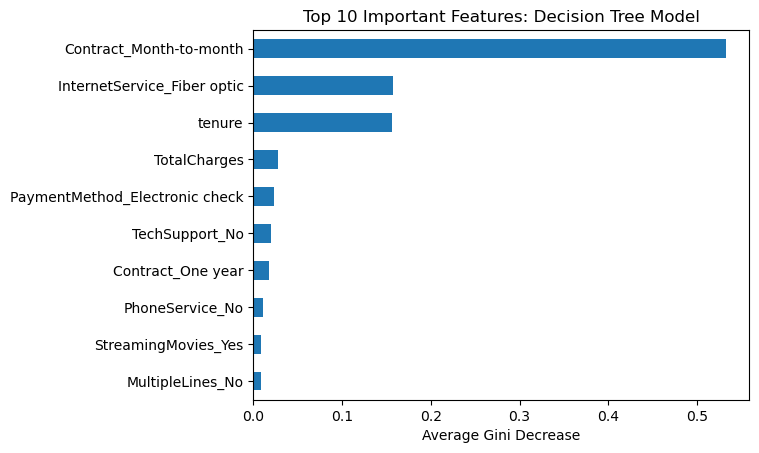

In [374]:
# chart of importance variables
importance = pd.Series(tree_importances, index=variables_names)
top_n = 10
top_n_idx = importance.argsort()[-top_n:]
top_n_importance = importance.iloc[top_n_idx]
top_n_importance.plot(kind="barh")
plt.xlabel('Average Gini Decrease')
plt.title(f'Top {top_n} Important Features: Decision Tree Model')


Text(0, 0.5, '')

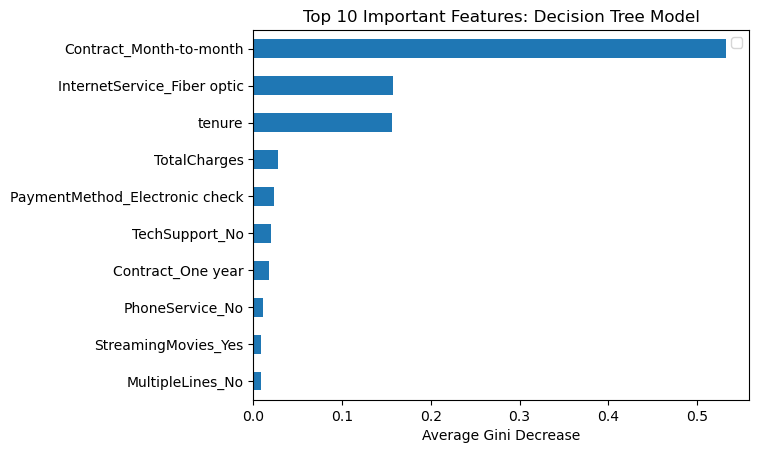

In [375]:
var_imp_tree_sorted.head(10).sort_values(by = 'gini').plot(x = 'Predictors', y = 'gini', kind = 'barh', label = '')
plt.legend('')
plt.xlabel('Average Gini Decrease')
plt.title(f'Top {top_n} Important Features: Decision Tree Model')
plt.ylabel('')

In [377]:
# bagging trees model
bagging_pipeline = Pipeline([
    ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier()))
],verbose=True)

# parameters bagging
# parameters bagging
bagging_params = {
    'bagging__n_estimators': [10, 50, 100, 500],
}

# random forest model pipeline
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier())
], verbose=True)

# rf parameters
rf_param = {
    'rf__n_estimators': [10, 50, 100,500],
    'rf__max_depth': [None, 5, 10],
}


In [379]:
#Fit bagging tree model
bagging_cv  = GridSearchCV(bagging_pipeline, bagging_params, cv = 10, scoring="accuracy", n_jobs=-1 )
bagging_cv.fit(x,y)

[Pipeline] ........... (step 1 of 1) Processing bagging, total=   1.4s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('bagging',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'bagging__n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [380]:
# obtain the estimators
bagging_best = bagging_cv.best_estimator_.named_steps['bagging']

In [382]:
# obtain the predictors 
bagging_importances = bagging_best.estimators_[0].feature_importances_
bagging_importances

array([0.10217002, 0.18710361, 0.18852223, 0.00936606, 0.01021484,
       0.01238048, 0.01455119, 0.01016892, 0.01298678, 0.01352469,
       0.01162712, 0.        , 0.00500876, 0.00301509, 0.00128945,
       0.00350669, 0.        , 0.0245707 , 0.        , 0.0566288 ,
       0.00024368, 0.0019208 , 0.00451102, 0.        , 0.01468814,
       0.01034134, 0.        , 0.00458796, 0.01020534, 0.        ,
       0.00259984, 0.00387477, 0.        , 0.00901266, 0.00321546,
       0.00063965, 0.0088894 , 0.17178248, 0.00371255, 0.        ,
       0.01572485, 0.01371446, 0.0075462 , 0.01567354, 0.02203961,
       0.00844082])

In [400]:
# %IncMSE/gini percent increase of MSE 
# estimate the importance of each predictor
# by looking at the increase MSE/gini
# when the predictor variable is removed from the model
top_n = 10


var_imp_bagg = pd.DataFrame({'Predictors': variables_names, 'gini': bagging_importances})
var_imp_bagg_sorted = var_imp_bagg.sort_values(by="gini", ascending=False)
print(f"Top {top_n} important predictors for bagging trees model")
print(var_imp_bagg_sorted.head(top_n))

Top 10 important predictors for bagging trees model
                               Predictors      gini
2                            TotalCharges  0.188522
1                          MonthlyCharges  0.187104
37                Contract_Month-to-month  0.171782
0                                  tenure  0.102170
19                      OnlineSecurity_No  0.056629
17            InternetService_Fiber optic  0.024571
44         PaymentMethod_Electronic check  0.022040
40                    PaperlessBilling_No  0.015725
43  PaymentMethod_Credit card (automatic)  0.015674
24                       OnlineBackup_Yes  0.014688


Text(0, 0.5, '')

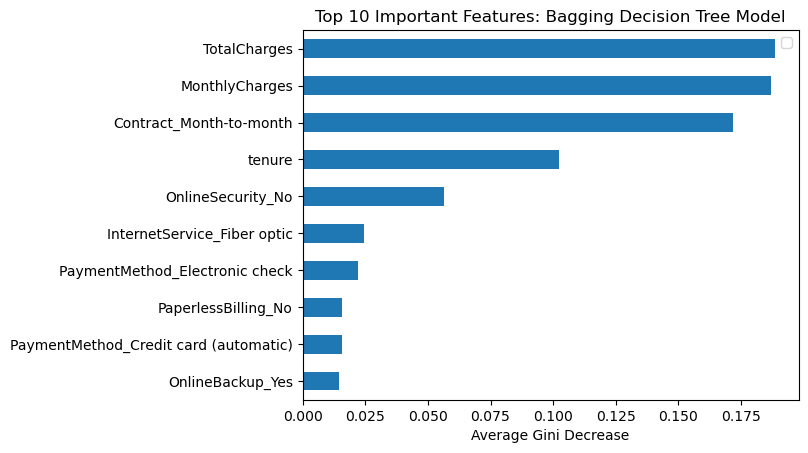

In [483]:
var_imp_bagg_sorted.head(top_n).sort_values(by='gini').plot(x = "Predictors", y = 'gini', kind='barh', label = 'gini')
plt.legend('')
plt.xlabel('Average Gini Decrease')
plt.title(f'Top {top_n} Important Features: Bagging Decision Tree Model')
plt.ylabel('')

In [396]:
#Random forest model
rf_cv = GridSearchCV(rf_pipeline, rf_param, cv = 10, scoring='accuracy', n_jobs=-1)
rf_cv.fit(x,y)

[Pipeline] ................ (step 1 of 1) Processing rf, total=   0.3s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('rf', RandomForestClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [398]:
#calculate important predictors

# obtain the estimators
rf_best =  rf_cv.best_estimator_.named_steps['rf']

In [399]:
# obtain the predictors %incmse for RF
rf_importances = rf_best.estimators_[0].feature_importances_
print(rf_importances)

[0.14980017 0.06422904 0.09482787 0.0083203  0.00668226 0.00543775
 0.00827568 0.00467863 0.02080737 0.00858723 0.00963237 0.00296354
 0.01022143 0.00694466 0.00382572 0.02021972 0.00568619 0.03485813
 0.         0.00546729 0.         0.02148577 0.00960131 0.10028838
 0.00824385 0.01754029 0.         0.00472644 0.00845893 0.
 0.01704314 0.00788301 0.         0.00635827 0.00923074 0.
 0.00608776 0.20879201 0.00163815 0.01376818 0.00138838 0.04797536
 0.01265141 0.01171981 0.006589   0.00706447]


In [401]:
# top five important variables using %IncMSE
var_imp_rf = pd.DataFrame({'Predictors':variables_names, 'gini':rf_importances})
var_imp_rf_sorted = var_imp_rf.sort_values(by = 'gini', ascending=False)
print(f"Top {top_n} important predictors for Random Forest trees model")
print(var_imp_rf_sorted.head(top_n))

Top 10 important predictors for Random Forest trees model
                          Predictors      gini
37           Contract_Month-to-month  0.208792
0                             tenure  0.149800
23  OnlineBackup_No internet service  0.100288
2                       TotalCharges  0.094828
1                     MonthlyCharges  0.064229
41              PaperlessBilling_Yes  0.047975
17       InternetService_Fiber optic  0.034858
21                OnlineSecurity_Yes  0.021486
8                        Partner_Yes  0.020807
15                 MultipleLines_Yes  0.020220


Text(0, 0.5, '')

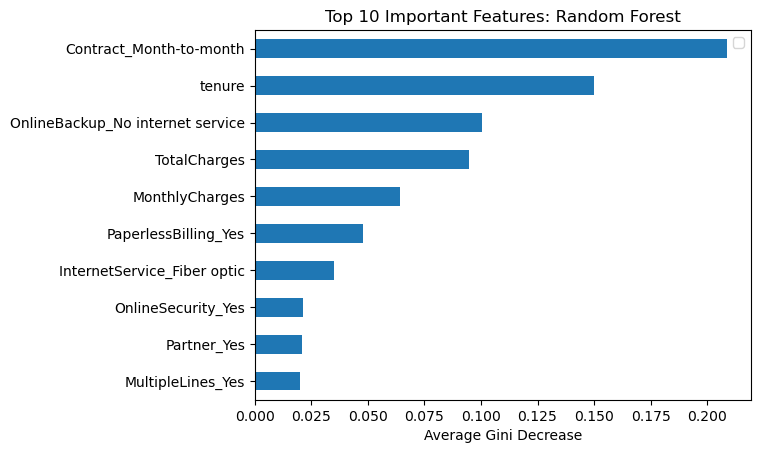

In [410]:
var_imp_rf_sorted.head(top_n).sort_values(by='gini').plot(x = "Predictors", y = 'gini',kind='barh', label='')
plt.legend('')
plt.xlabel('Average Gini Decrease')
plt.title(f'Top {top_n} Important Features: Random Forest')
plt.ylabel('')

In [412]:
#boosting
from sklearn.ensemble import GradientBoostingClassifier

# boosting - GradientBoostingClassifier default trees
boost_tree_pipeline =  Pipeline([
   ('gbt', GradientBoostingClassifier())
], verbose = True)

In [413]:
# parameters
boost_tree_param =  {
   'gbt__learning_rate': [0.1, 0.05, 0.01],
    'gbt__n_estimators': [50, 100, 200],
    'gbt__max_depth': [3, 4, 5]
}

#n_estimators: number of decision trees to include in the ensemble.
#learning_rate: the learning rate shrinks the contribution of each tree by learning_rate amount.
#max_depth: the maximum depth of the decision trees.
#max_features: the number of features to consider when looking for the best split. 
#subsample: the fraction of samples to be used for fitting the individual base learners. Values lower than 1.0 would make

In [414]:
# fit model & cross validation k-fold
boosting_tree_cv = GridSearchCV(boost_tree_pipeline, param_grid=boost_tree_param, cv = 10, scoring = 'accuracy', n_jobs=-1)
boosting_tree_cv.fit(x, y)

[Pipeline] ............... (step 1 of 1) Processing gbt, total=   1.5s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('gbt', GradientBoostingClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'gbt__learning_rate': [0.1, 0.05, 0.01],
                         'gbt__max_depth': [3, 4, 5],
                         'gbt__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [415]:
#calculate important predictors

# obtain the estimators
boosting_best =  boosting_tree_cv.best_estimator_.named_steps['gbt']

# obtain the predictors %incmse for RF
boosting_importances = boosting_best.feature_importances_
print(boosting_importances)

[1.58883066e-01 7.26322290e-02 7.69233141e-02 0.00000000e+00
 1.04182080e-03 2.58880009e-03 3.45588231e-03 0.00000000e+00
 1.70078034e-04 5.80640846e-04 1.79465143e-03 1.07448903e-04
 8.67015467e-04 9.18679635e-03 1.62262633e-03 2.69605465e-04
 4.08294831e-04 8.59101870e-02 0.00000000e+00 6.73766224e-02
 0.00000000e+00 0.00000000e+00 6.99514183e-03 0.00000000e+00
 0.00000000e+00 1.84372545e-04 0.00000000e+00 6.32468292e-04
 4.32698414e-02 0.00000000e+00 0.00000000e+00 6.55654029e-04
 0.00000000e+00 1.15091893e-03 4.45208064e-04 0.00000000e+00
 4.08825554e-03 3.85656577e-01 3.29669109e-03 9.20185881e-03
 8.15748251e-03 8.78935395e-03 1.45450506e-03 8.88499860e-04
 4.04543237e-02 8.59768655e-04]


In [420]:
# top five important variables using %IncMSE
top_n = 10

var_imp_boost = pd.DataFrame({'Predictors':variables_names, 'gini':boosting_importances})
var_imp_boost_sorted = var_imp_boost.sort_values(by = 'gini', ascending=False)
print(f"Top {top_n} important predictors for bagging trees model")
print(var_imp_boost_sorted.head(top_n))

Top 10 important predictors for bagging trees model
                        Predictors      gini
37         Contract_Month-to-month  0.385657
0                           tenure  0.158883
17     InternetService_Fiber optic  0.085910
2                     TotalCharges  0.076923
1                   MonthlyCharges  0.072632
19               OnlineSecurity_No  0.067377
28                  TechSupport_No  0.043270
44  PaymentMethod_Electronic check  0.040454
39               Contract_Two year  0.009202
13                MultipleLines_No  0.009187


Text(0, 0.5, '')

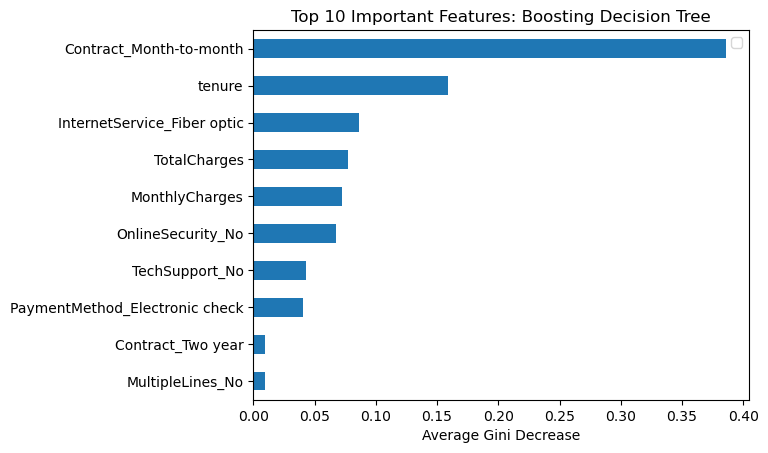

In [422]:
var_imp_boost_sorted.head(top_n).sort_values(by='gini').plot(x = "Predictors", y = 'gini',kind='barh', label='')
plt.legend('')
plt.xlabel('Average Gini Decrease')
plt.title(f'Top {top_n} Important Features: Boosting Decision Tree')
plt.ylabel('')

In [432]:
# prediction analysis of churn customers
# 70/30 split training/test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=1) 

1773    0
5028    1
1102    0
1660    0
925     1
       ..
2048    1
6208    0
5213    0
5859    0
4390    0
Name: is_churn, Length: 2110, dtype: int64

In [437]:
# decision tree model
# tune parameters, fit model on traning set for prediction 
tree_cv = GridSearchCV(tree_pipeline, tree_param, cv = 10, scoring = 'accuracy', n_jobs=-1)
tree_cv.fit(x_train, y_train)

[Pipeline] .............. (step 1 of 1) Processing tree, total=   0.0s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tree', DecisionTreeClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'tree__criterion': ['gini', 'entropy'],
                         'tree__max_depth': [3, 5, 10, None],
                         'tree__min_samples_leaf': [1, 2, 4],
                         'tree__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [438]:
#####
#####

#predictions on test set
tree_cv.best_estimator_
tree_pred = tree_cv.predict(x_test)

In [439]:
# confusion matrix
print(pd.crosstab(y_test, tree_pred, rownames=['True'], colnames=['Predicted'], margins=True))


Predicted     0    1   All
True                      
0          1459   96  1555
1           331  224   555
All        1790  320  2110


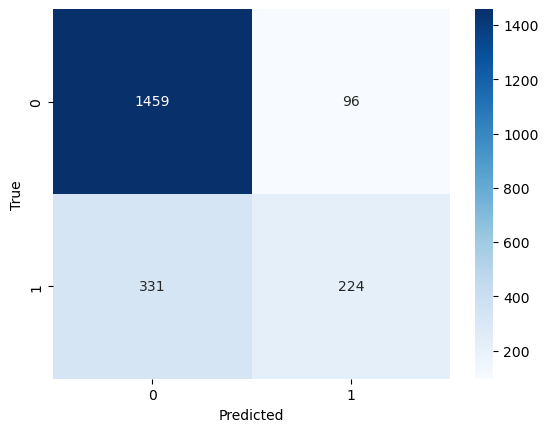

In [440]:
# heatmap of results

tree_cm = confusion_matrix(y_test, tree_pred)
sns.heatmap(tree_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [444]:
#  confusion matrix
report = classification_report(y_test, tree_pred)

# Print the report
print(report)
t_accuracy = accuracy_score(y_test, tree_pred).round(2)
t_precision = precision_score(y_test, tree_pred).round(2)
t_recall = recall_score(y_test, tree_pred).round(2)
t_f1 = f1_score(y_test, tree_pred).round(2)
t_balanced_acc = balanced_accuracy_score(y_test, tree_pred).round(2)


print(f"Decision tree model: accuracy: {t_accuracy}, precision: {t_precision}, recall: {t_recall}, f1 score: {t_f1}, balanced accuracy {t_balanced_acc}")


              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1555
           1       0.70      0.40      0.51       555

    accuracy                           0.80      2110
   macro avg       0.76      0.67      0.69      2110
weighted avg       0.78      0.80      0.78      2110

Decision tree model: accuracy: 0.8, precision: 0.7, recall: 0.4, f1 score: 0.51, balanced accuracy 0.67


In [445]:
# cross validation bagging model
bagging_cv = GridSearchCV(bagging_pipeline, param_grid = bagging_params, cv = 10, scoring = 'accuracy', n_jobs=-1)# ,'f1'])
bagging_cv.fit(x_train, y_train)

[Pipeline] ........... (step 1 of 1) Processing bagging, total=   2.1s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('bagging',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'bagging__n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [446]:
# cross validation rf model 
rf_cv = GridSearchCV(rf_pipeline, param_grid= rf_param, cv = 10, scoring = 'accuracy', n_jobs=-1)
rf_cv.fit(x_train, y_train)

[Pipeline] ................ (step 1 of 1) Processing rf, total=   2.5s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('rf', RandomForestClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [447]:
# parameters of n trees bagging
bagging_best_params = bagging_cv.best_params_
print(bagging_best_params)


# parameters of rf 
rf_best_params = rf_cv.best_params_
print(rf_best_params)

{'bagging__n_estimators': 100}
{'rf__max_depth': 10, 'rf__n_estimators': 500}


In [448]:
# prediction on test dataset using bagging model
pred_bagging = bagging_cv.predict(x_test)

In [449]:
bagging_cm = confusion_matrix(y_test, pred_bagging)
print(pd.crosstab(y_test, pred_bagging, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted     0    1   All
True                      
0          1373  182  1555
1           288  267   555
All        1661  449  2110


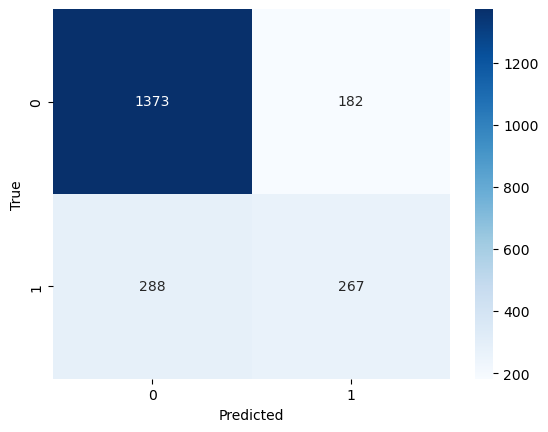

In [450]:
# heatmap of results
sns.heatmap(bagging_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [451]:
#  confusion matrix
report = classification_report(y_test, pred_bagging)

# Print the report
print(report)
bag_accuracy = accuracy_score(y_test, pred_bagging).round(2)
bag_precision = precision_score(y_test, pred_bagging).round(2)
bag_recall = recall_score(y_test, pred_bagging).round(2)
bag_f1 = f1_score(y_test, pred_bagging).round(2)
bag_balanced_acc = balanced_accuracy_score(y_test, pred_bagging). round(2)


print(f"Decision tree model: accuracy: {bag_accuracy}, precision: {bag_precision}, recall: {bag_recall}, f1 score: {bag_f1}, Balanced accuracy {bag_balanced_acc}")


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1555
           1       0.59      0.48      0.53       555

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110

Decision tree model: accuracy: 0.78, precision: 0.59, recall: 0.48, f1 score: 0.53, Balanced accuracy 0.68


In [452]:
# random forest predicitons
pred_rf = rf_cv.predict(x_test)

In [453]:
# confusion matrix
rf_cm = confusion_matrix(y_test, pred_rf)
print(pd.crosstab(y_test, pred_rf, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted     0    1   All
True                      
0          1399  156  1555
1           273  282   555
All        1672  438  2110


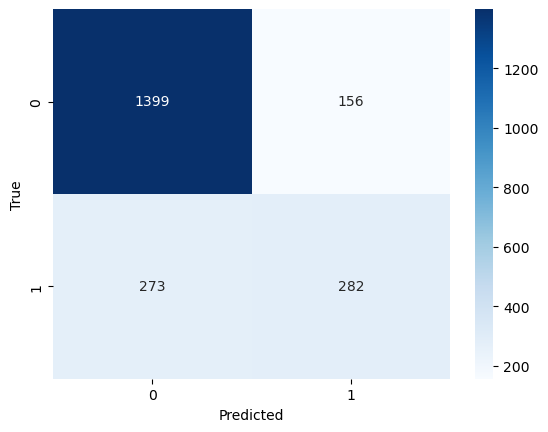

In [454]:
# heatmap of results
sns.heatmap(rf_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [455]:
#  confusion matrix
report_rf = classification_report(y_test, pred_rf)

# Print the report
print(report_rf)
rf_accuracy = accuracy_score(y_test, pred_rf).round(2)
rf_precision = precision_score(y_test, pred_rf).round(2)
rf_recall = recall_score(y_test, pred_rf).round(2)
rf_f1 = f1_score(y_test, pred_rf).round(2)
rf_balanced_acc = balanced_accuracy_score(y_test, pred_rf). round(2)

print(f"Decision tree model: accuracy: {rf_accuracy}, precision: {rf_precision}, recall: {rf_recall}, f1 score: {rf_f1}, Balanced accuracy {rf_balanced_acc}")


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.64      0.51      0.57       555

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Decision tree model: accuracy: 0.8, precision: 0.64, recall: 0.51, f1 score: 0.57, Balanced accuracy 0.7


In [456]:
# boosting model
# fit model & cross validation k-fold
boosting_tree_cv = GridSearchCV(boost_tree_pipeline, param_grid=boost_tree_param, cv = 10, scoring = 'accuracy', n_jobs=-1)
boosting_tree_cv.fit(x_train, y_train)

# parameters of boosting 
boost_best_params = boosting_tree_cv.best_params_
print(boost_best_params)

#{'gbt__learning_rate': 0.1, 'gbt__max_depth': 6, 'gbt__n_estimators': 200}

[Pipeline] ............... (step 1 of 1) Processing gbt, total=   0.5s
{'gbt__learning_rate': 0.1, 'gbt__max_depth': 3, 'gbt__n_estimators': 50}


In [457]:
# prediction on test dataset using bagging model
pred_boosting = boosting_tree_cv.predict(x_test)

In [459]:
print(pd.crosstab(y_test, pred_boosting, rownames=['True'], colnames=['Predicted'], margins=True))


Predicted     0    1   All
True                      
0          1413  142  1555
1           281  274   555
All        1694  416  2110


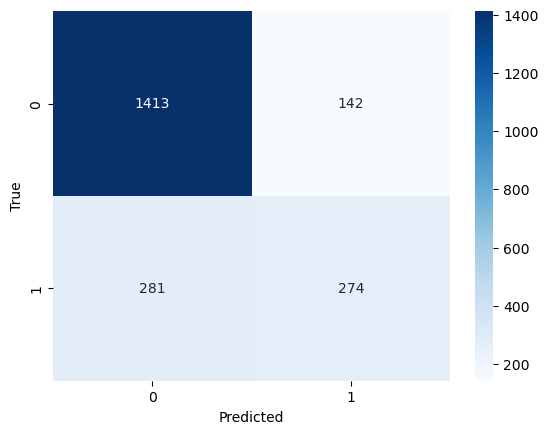

In [461]:
# heatmap of results
boosting_cm = confusion_matrix(y_test, pred_boosting) # matrix

sns.heatmap(boosting_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [462]:
#  confusion matrix
report_boosting = classification_report(y_test, pred_boosting)

# Print the report
print(report_boosting)
boost_accuracy = accuracy_score(y_test, pred_boosting).round(2)
boost_precision = precision_score(y_test, pred_boosting).round(2)
boost_recall = recall_score(y_test, pred_boosting).round(2)
boost_f1 = f1_score(y_test, pred_boosting).round(2)
boost_balanced_acc = balanced_accuracy_score(y_test, pred_boosting). round(2)

print(f"Decision tree model: accuracy: {boost_accuracy}, precision: {boost_precision}, recall: {boost_recall}, f1 score: {boost_f1}, Balanced accuracy {boost_balanced_acc}")


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1555
           1       0.66      0.49      0.56       555

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Decision tree model: accuracy: 0.8, precision: 0.66, recall: 0.49, f1 score: 0.56, Balanced accuracy 0.7


In [463]:
# SVM
from sklearn.svm import SVC

In [464]:
# SVM MODEL
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
], verbose=True)

# svm parameter
svm_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'poly','rbf'],
    'svm__gamma': [0.1, 1, 10 ]
}

In [465]:
# fit model & cross validation k-fold
svm_cv = GridSearchCV(svm_pipeline, param_grid=svm_grid, cv = 10, scoring = 'accuracy', n_jobs=-1)
svm_cv.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svm, total=   4.6s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(probability=True))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10],
                         'svm__kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [466]:
# parameters of svm
svm_best_params = svm_cv.best_params_
print(svm_best_params)

{'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}


In [467]:
# prediction on test dataset using svm model
pred_svm = svm_cv.predict(x_test)

In [468]:
print(pd.crosstab(y_test, pred_svm, rownames=['True'], colnames=['Predicted'], margins=True))


Predicted     0    1   All
True                      
0          1379  176  1555
1           245  310   555
All        1624  486  2110


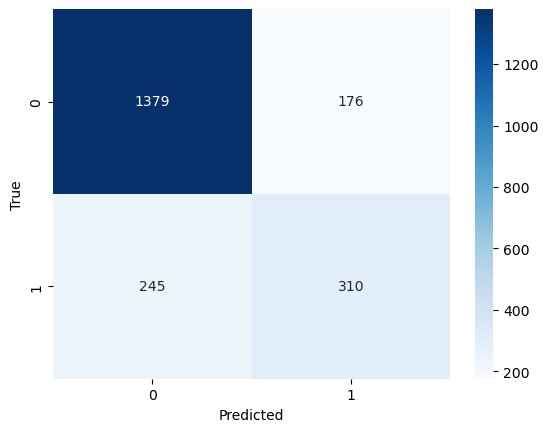

In [469]:
# heatmap of results
svm_cm = confusion_matrix(y_test, pred_svm) # matrix

sns.heatmap(svm_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [470]:
#  confusion matrix
report_svm = classification_report(y_test, pred_svm)

# Print the report
print(report_svm)
svm_accuracy = accuracy_score(y_test, pred_svm).round(2)
svm_precision = precision_score(y_test, pred_svm).round(2)
svm_recall = recall_score(y_test, pred_svm).round(2)
svm_f1 = f1_score(y_test, pred_svm).round(2)
svm_balanced_acc = balanced_accuracy_score(y_test, pred_svm). round(2)

print(f"SVM model: accuracy: {svm_accuracy}, precision: {svm_precision}, recall: {svm_recall}, f1 score: {svm_f1}, balanced accuracy {svm_balanced_acc}")


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1555
           1       0.64      0.56      0.60       555

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

SVM model: accuracy: 0.8, precision: 0.64, recall: 0.56, f1 score: 0.6, balanced accuracy 0.72


In [ ]:
# fit logistic lasso regression
logistic_cv = GridSearchCV(logistic_pipe, param_grid, cv=10, scoring='accuracy', n_jobs = -1)
logistic_cv.fit(x_train, y_train)

In [471]:
# Fit grid search object to the data
log_best_params = logistic_cv.best_params_
print(log_best_params)

pred_log = logistic_cv.predict(x_test)


{'log__class_weight': None}


In [472]:
print(pd.crosstab(y_test, pred_log, rownames=['True'], colnames=['Predicted'], margins=True))


Predicted     0    1   All
True                      
0          1390  165  1555
1           253  302   555
All        1643  467  2110


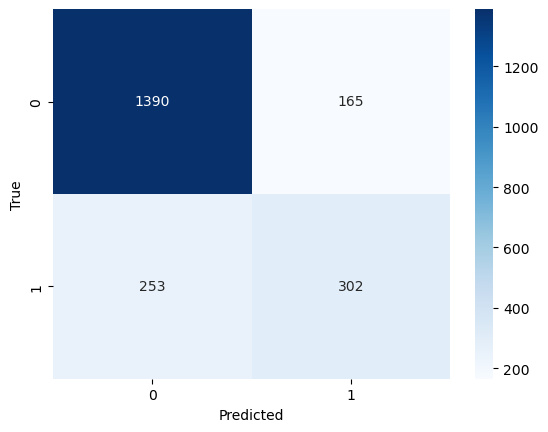

In [473]:
# heatmap of results
log_cm = confusion_matrix(y_test, pred_log) # matrix

sns.heatmap(log_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [474]:
#  confusion matrix
report_log = classification_report(y_test, pred_log)

# Print the report
print(report_log)
log_accuracy = accuracy_score(y_test, pred_log).round(2)
log_precision = precision_score(y_test, pred_log).round(2)
log_recall = recall_score(y_test, pred_log).round(2)
log_f1 = f1_score(y_test, pred_log).round(2)
log_balanced_acc = balanced_accuracy_score(y_test, pred_log). round(2)

print(f"Logistic Lasso Regression model: accuracy: {log_accuracy}, precision: {log_precision}, recall: {log_recall}, f1 score: {log_f1}, balanced accuracy {log_balanced_acc}")


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1555
           1       0.65      0.54      0.59       555

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

Logistic Lasso Regression model: accuracy: 0.8, precision: 0.65, recall: 0.54, f1 score: 0.59, balanced accuracy 0.72


In [475]:
#AUC curve
from sklearn.metrics import roc_curve, auc

# probabilites on test set logisitc
log_y_prob = logistic_cv.predict_proba(x_test)[:, 1]
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_y_prob)
log_roc_auc = auc(log_fpr, log_tpr)

# decision tree
tree_y_prob = tree_cv.predict_proba(x_test)[:, 1]
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, tree_y_prob)
tree_roc_auc = auc(tree_fpr, tree_tpr)

# bagging trees
bagging_y_prob = bagging_cv.predict_proba(x_test)[:, 1]
bagging_fpr, bagging_tpr, bagging_thresholds = roc_curve(y_test, bagging_y_prob)
bagging_roc_auc = auc(bagging_fpr, bagging_tpr)

# Boosting trees
boosting_y_prob = boosting_tree_cv.predict_proba(x_test)[:, 1]
boosting_fpr, boosting_tpr, boosting_thresholds = roc_curve(y_test, boosting_y_prob)
boosting_roc_auc = auc(boosting_fpr, boosting_tpr)

# Random Forest
rf_y_prob = rf_cv.predict_proba(x_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_prob)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# SVM
svm_y_prob = svm_cv.predict_proba(x_test)[:, 1]
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_prob)
svm_roc_auc = auc(svm_fpr, svm_tpr)

print(f"Logistic AUC: {log_roc_auc.round(2)}")
print(f"Decision tree AUC: {tree_roc_auc.round(2)}")
print(f"Bagging Decision tree AUC: {bagging_roc_auc.round(2)}")
print(f"Boosting Decision tree AUC: {boosting_roc_auc.round(2)}")
print(f"Random Forest AUC: {rf_roc_auc.round(2)}")
print(f"SVM AUC: {svm_roc_auc.round(2)}")

Logistic AUC: 0.85
Decision tree AUC: 0.83
Bagging Decision tree AUC: 0.81
Boosting Decision tree AUC: 0.85
Random Forest AUC: 0.84
SVM AUC: 0.84


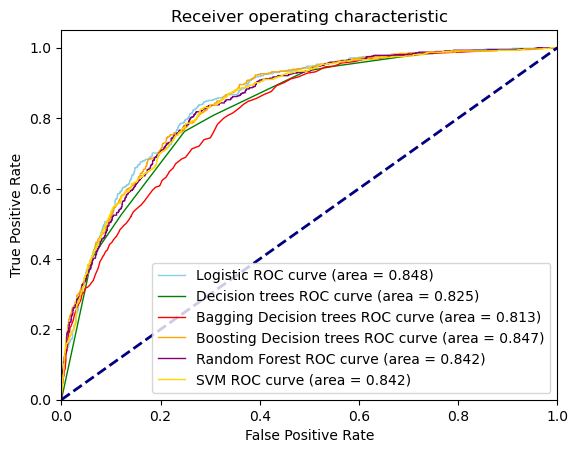

In [476]:
# Plot ROC curve
plt.figure()
plt.plot(log_fpr, log_tpr, color='skyblue', lw=1, label='Logistic ROC curve (area = %0.3f)' % log_roc_auc)
plt.plot(tree_fpr, tree_tpr, color='green', lw=1, label='Decision trees ROC curve (area = %0.3f)' % tree_roc_auc)
plt.plot(bagging_fpr, bagging_tpr, color='red', lw=1, label='Bagging Decision trees ROC curve (area = %0.3f)' % bagging_roc_auc)
plt.plot(boosting_fpr, boosting_tpr, color='orange', lw=1, label='Boosting Decision trees ROC curve (area = %0.3f)' % boosting_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='purple', lw=1, label='Random Forest ROC curve (area = %0.3f)' % rf_roc_auc)
plt.plot(svm_fpr, svm_tpr, color='gold', lw=1, label='SVM ROC curve (area = %0.3f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [478]:
# performance metrics table

tb = {
    'Models'   : ['Boosting Decision tree', 'Random Forest', 'Bagging Decision tree', 'SVM', 'Decision tree', 'Logistic Lasso Regression'],
    "Accuracy" : [boost_accuracy, rf_accuracy, bag_accuracy, svm_accuracy, t_accuracy,log_accuracy],
    'Precision': [boost_precision, rf_precision, bag_precision, svm_precision, t_precision, log_precision],
    'Recall'   : [boost_recall,  rf_recall, bag_recall, svm_recall, t_recall,log_recall],
    'F1 Score' : [boost_f1,  rf_f1, bag_f1, svm_f1, t_f1,log_f1],
    'Balanced accuracy' : [boost_balanced_acc, rf_balanced_acc, bag_balanced_acc, svm_balanced_acc, t_balanced_acc ,log_balanced_acc]
}

tb_df = pd.DataFrame(tb)
print(tb_df.to_markdown(index = False))

| Models                    |   Accuracy |   Precision |   Recall |   F1 Score |   Balanced accuracy |
|:--------------------------|-----------:|------------:|---------:|-----------:|--------------------:|
| Boosting Decision tree    |       0.8  |        0.66 |     0.49 |       0.56 |                0.7  |
| Random Forest             |       0.8  |        0.64 |     0.51 |       0.57 |                0.7  |
| Bagging Decision tree     |       0.78 |        0.59 |     0.48 |       0.53 |                0.68 |
| SVM                       |       0.8  |        0.64 |     0.56 |       0.6  |                0.72 |
| Decision tree             |       0.8  |        0.7  |     0.4  |       0.51 |                0.67 |
| Logistic Lasso Regression |       0.8  |        0.65 |     0.54 |       0.59 |                0.72 |
